In [1]:
from utils import toy_ex_figures, compute_all_exp
from shap import KernelExplainer
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances
from sklearn.svm import OneClassSVM
from matplotlib.lines import Line2D

2D Iris

In [2]:
iris = load_iris(return_X_y=False)
X = iris.data[:,1:3]
y = iris.target
feature_names = iris.feature_names[1:3]

In [3]:
model = MLPClassifier(random_state=1, max_iter=300)
model.fit(X, y)
print(accuracy_score(model.predict(X),y))

0.94


Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.


In [4]:
explainer = KernelExplainer(model.predict_proba, X)

Using 150 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [7]:
explanations = compute_all_exp(X, explainer, model, label="all")

100%|██████████| 79/79 [00:32<00:00,  2.42it/s]


 24%|██▍       | 19/79 [00:00<00:00, 186.77it/s]

x_i:[3.2 4.7], label:1
e_i (red) [0.09141637 0.35130883]
e_p1 (blue) [0.08724928 0.43103871]
e_p2 (magenta) [-0.12619578  0.47640601]
e_p3 (lime) [0.07771267 0.43725794]


100%|██████████| 79/79 [00:00<00:00, 197.04it/s]


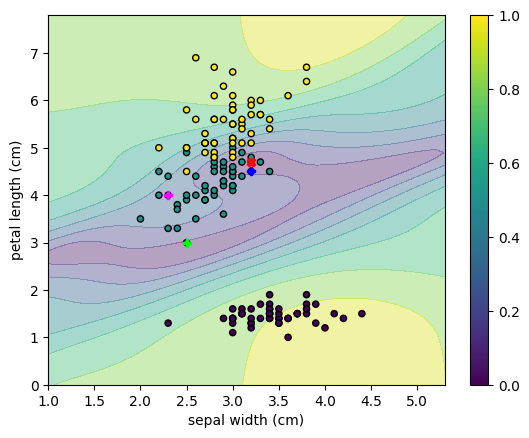

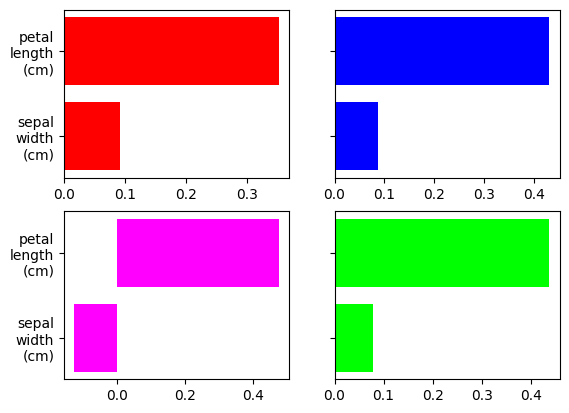

In [10]:
toy_ex_figures(X,y,feature_names,explanations, model, explainer, i=50, p1=51, p2=53, p3=98, metric='l2')

Flame

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [3]:
data=pd.read_csv("data/flame.txt",sep="\t",header=None)
labels = data.iloc[:,-1]
data.drop(data.columns[len(data.columns)-1], axis=1, inplace=True)
X=np.array(data)
y=np.array(labels)-1
feature_names=["x0","x1"]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [4]:
model = MLPClassifier(hidden_layer_sizes=(30,20,10),random_state=1, max_iter=700)
model.fit(X, y)
print(accuracy_score(model.predict(X),y))

0.9958333333333333


In [5]:
explainer = KernelExplainer(model.predict_proba, X)

Using 240 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [6]:
from utils import get_local_exp, diff_explanation
from tqdm import tqdm
def compute_all_exp(X, explainer, model, label):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))
    Z = []
    for ii in tqdm(range(xx.shape[0])):
        for j in range(xx.shape[1]):
            x = np.array([xx[ii][j],yy[ii][j]])
            e_x = get_local_exp(x, explainer, model, label=label)
            Z.append(e_x)
    return Z

In [7]:
explanations = compute_all_exp(X, explainer, model, label="all")

100%|██████████| 121/121 [03:13<00:00,  1.60s/it]


100%|██████████| 30/30 [00:00<00:00, 276.05it/s]

x_i:[0.06569343 0.65917603], label:1
e_i (red) [ 0.43464297 -0.16567037]
e_p1 (blue) [-0.06055789  0.42857684]
e_p2 (magenta) [-0.02964351  0.3981171 ]
e_p3 (lime) [-0.04215809  0.410063  ]


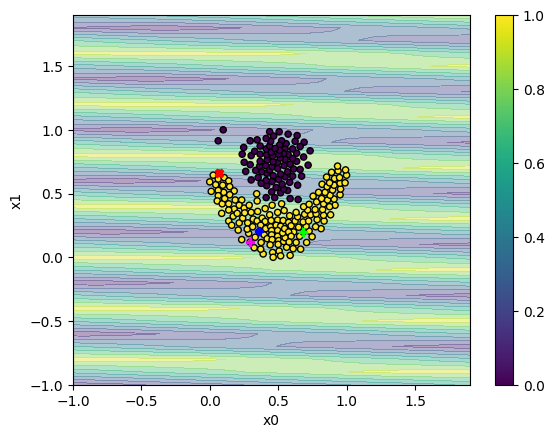

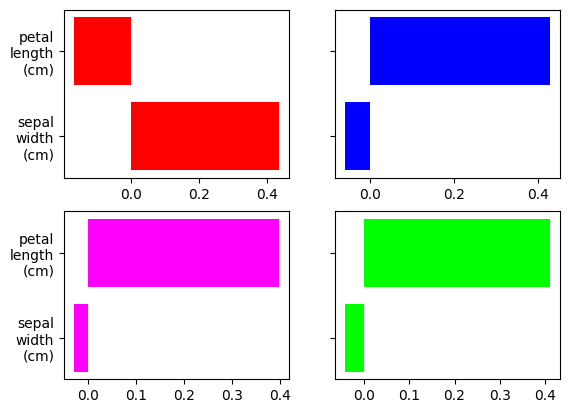

In [9]:
toy_ex_figures(X,y,feature_names,explanations, model, explainer, i=2, p1=51, p2=53, p3=98, metric='l2')

Text(0, 0.5, '$x_1$')

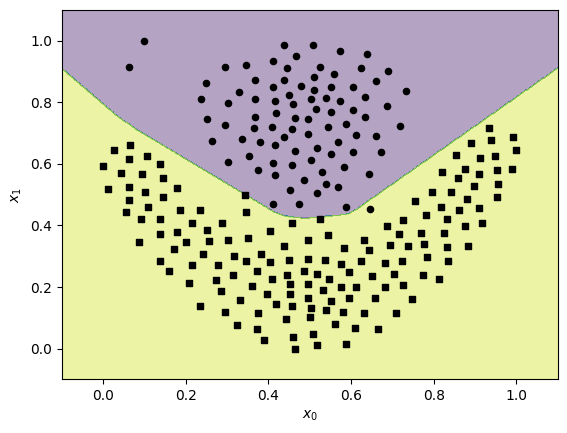

In [10]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
DecisionBoundaryDisplay.from_estimator(model, X,eps=0.1, grid_resolution=500, alpha=0.4, response_method="predict")
l = [[0.267004, 0.004874, 0.329415],[0.993248, 0.906157, 0.143936],[0.127568, 0.566949, 0.550556]]
m = ['o','s']
for i in range(0,2):
    a = np.where(y==i)
    # plt.scatter(X[a, 0], X[a, 1], c = l[i],s=20, edgecolor='k')
    plt.scatter(X[a, 0], X[a, 1], c = "black",s=20, marker=m[i])
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
# plt.savefig('toy_ex/decision_boundaries_flame.pdf')

In [70]:
from utils import get_local_exp, diff_explanation
from tqdm import tqdm
def toy_ex_figures(X, y, feature_names, explanations, model, explainer, i, p1, p2, p3, metric='euclidean'):
    exps = explanations.copy()
    x_i = X[i]
    x_p1 = X[p1]
    x_p2 = X[p2]
    x_p3 = X[p3]
    label = int(model.predict(x_i.reshape(1, -1)))
    print(f"x_i:{x_i}, label:{label}")
    e_i = get_local_exp(x_i, explainer, model, label)
    e_p1 = get_local_exp(x_p1, explainer, model, label)
    e_p2 = get_local_exp(x_p2, explainer, model, label)
    e_p3 = get_local_exp(x_p3, explainer, model, label)

    print("e_i (red)",e_i)
    print("e_p1 (blue)",e_p1)
    print("e_p2 (magenta)",e_p2)
    print("e_p3 (lime)",e_p3)

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))
    Z = []
    for ii in tqdm(range(xx.shape[0])):
        for j in range(xx.shape[1]):
            e_x = exps.pop(0)[label]
            Z.append(diff_explanation(e_x,e_i, metric=metric))
    Z=np.asarray(Z)
    Z = Z.reshape(xx.shape)

    label = 1
    threshold_diff = 0.2
    gamma = 20
    
    exp_X=[get_local_exp(x, explainer, model, label=label) for x in X]
    dists_exp = pairwise_distances(np.asarray(exp_X))
    VD = np.asarray(dists_exp<threshold_diff).astype(int)
    vd = VD[i]
    clf = OneClassSVM(nu=0.01,gamma=gamma).fit(X[np.where(vd)])


    fig,ax = plt.subplots()
    # display = DecisionBoundaryDisplay.from_estimator(clf, X,eps=0.1, grid_resolution=500, alpha=0.4, response_method="predict", plot_method="contour")
    # plt.contourf(xx, yy, Z, alpha=0.6,cmap='coolwarm')
    # plt.colorbar()
    # plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    m = ['o','s']
    l = [[0.267004, 0.004874, 0.329415],[0.993248, 0.906157, 0.143936],[0.127568, 0.566949, 0.550556]]
    for i in range(0,2):
        a = np.where(y==i)
        if i==0:
            plt.scatter(X[a, 0], X[a, 1], c = model.predict(X[a]),s=20, marker=m[i], edgecolor='k')
        if i==1:
            plt.scatter(X[a, 0], X[a, 1], c = l[1],s=20, marker=m[i], edgecolor='k')
    # plt.scatter(X[:, 0], X[:, 1], c=model.predict(X), s=20, edgecolor='k')
    # plt.scatter(x_p1[0], x_p1[1],c='blue',marker='P')
    # plt.scatter(x_p2[0], x_p2[1],c='magenta',marker='P')
    # plt.scatter(x_p3[0], x_p3[1],c='lime',marker='P')
    plt.scatter(x_i[0], x_i[1],c='red',marker='X')
    circle = plt.Circle((x_i[0], x_i[1]), 0.1, color='r', fill=False)
    # ax.add_patch(circle)
    fig.set_size_inches(4.8,4.8)
    # display.ax_.add_patch(circle)
    # display.ax_.add_line(Line2D([0.64,0.64,1],[0,0.69,0.69],color='red',linewidth=2,linestyle='--'))
    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")
    plt.savefig('toy_ex/validity.pdf')
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].barh(['$x_0$', '$x_1$'],e_i,color='red')
    axs[0, 1].barh([" ",""],e_p1,color='blue')
    axs[1, 0].barh(['$x_0$', '$x_1$'],e_p2,color='magenta')
    axs[1, 1].barh([" ",""],e_p3,color='lime')
    # plt.savefig('toy_ex/explanations.pdf')
    return Z,xx,yy

  6%|▌         | 7/121 [00:00<00:01, 68.81it/s]

x_i:[0.49635036 0.35205993], label:1
e_i (red) [-0.11332524  0.42865127]
e_p1 (blue) [-0.09785578  0.4615711 ]
e_p2 (magenta) [-0.02433277  0.39266885]
e_p3 (lime) [-0.21791471  0.16430681]


100%|██████████| 121/121 [00:01<00:00, 75.07it/s]
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


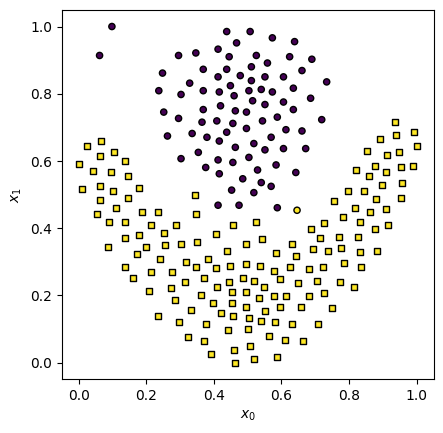

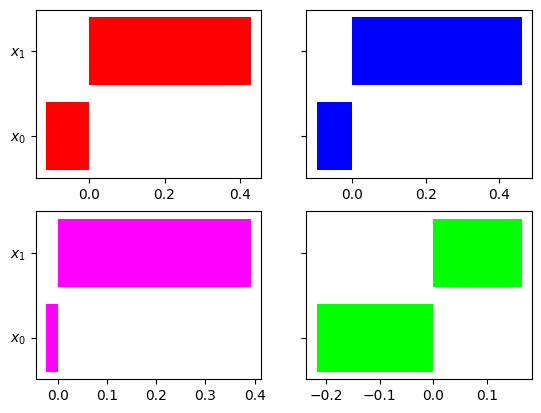

In [71]:
Z,xx,yy = toy_ex_figures(X,y,feature_names,explanations, model, explainer, i=149, p1=63, p2=41, p3=151, metric='l2')
# Z,xx,yy = toy_ex_figures(X,y,feature_names,explanations, model, explainer, i=35, p1=63, p2=41, p3=151, metric='l2')

In [ ]:
# # np.where(X==np.asarray([0.90875912, 0.56554307]))
# for i,x in enumerate(X):
#     print(i,x)

In [104]:
from utils import get_local_exp, diff_explanation
from tqdm import tqdm
def toy_ex_figures(X, y, feature_names, explanations, model, explainer, i, p1, p2, p3, metric='euclidean'):
    exps = explanations.copy()
    x_i = X[i]
    x_p1 = X[p1]
    x_p2 = X[p2]
    x_p3 = X[p3]
    label = int(model.predict(x_i.reshape(1, -1)))
    print(f"x_i:{x_i}, label:{label}")
    e_i = get_local_exp(x_i, explainer, model, label)
    e_p1 = get_local_exp(x_p1, explainer, model, label)
    e_p2 = get_local_exp(x_p2, explainer, model, label)
    e_p3 = get_local_exp(x_p3, explainer, model, label)

    print("e_i (red)",e_i)
    print("e_p1 (blue)",e_p1)
    print("e_p2 (magenta)",e_p2)
    print("e_p3 (lime)",e_p3)

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))
    Z = []
    for ii in tqdm(range(xx.shape[0])):
        for j in range(xx.shape[1]):
            e_x = exps.pop(0)[label]
            Z.append(diff_explanation(e_x,e_i, metric=metric))
    Z=np.asarray(Z)
    Z = Z.reshape(xx.shape)

    label = 1
    threshold_diff = 0.2
    gamma = 20
    
    exp_X=[get_local_exp(x, explainer, model, label=label) for x in X]
    dists_exp = pairwise_distances(np.asarray(exp_X))
    VD = np.asarray(dists_exp<threshold_diff).astype(int)
    vd = VD[i]
    clf = OneClassSVM(nu=0.01,gamma=gamma).fit(X[np.where(vd)])


    fig,ax = plt.subplots()
    display = DecisionBoundaryDisplay.from_estimator(clf, X,eps=0.1, grid_resolution=500, alpha=0.4, response_method="predict", plot_method="contour")
    plt.contourf(xx, yy, Z, alpha=0.6,cmap='coolwarm')
    plt.colorbar()
    # plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    m = ['o','s']
    l = [[0.267004, 0.004874, 0.329415],[0.993248, 0.906157, 0.143936],[0.127568, 0.566949, 0.550556]]
    for i in range(0,2):
        a = np.where(y==i)
        if i==0:
            plt.scatter(X[a, 0], X[a, 1], c = model.predict(X[a]),s=20, marker=m[i], edgecolor='k')
        if i==1:
            plt.scatter(X[a, 0], X[a, 1], c = l[1],s=20, marker=m[i], edgecolor='k')
    # plt.scatter(X[:, 0], X[:, 1], c=model.predict(X), s=20, edgecolor='k')
    # plt.scatter(x_p1[0], x_p1[1],c='blue',marker='P')
    # plt.scatter(x_p2[0], x_p2[1],c='magenta',marker='P')
    # plt.scatter(x_p3[0], x_p3[1],c='lime',marker='P')
    plt.scatter(x_i[0], x_i[1],c='red',marker='X')
    # circle = plt.Circle((x_i[0], x_i[1]), 0.1, color='r', fill=False)
    # display.ax_.add_patch(circle)
    display.ax_.add_line(Line2D([0.64,0.64,1],[0,0.69,0.69],color='red',linewidth=2,linestyle='--'))
    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")
    plt.savefig('toy_ex/validity.pdf')
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].barh(['$x_0$', '$x_1$'],e_i,color='red')
    axs[0, 1].barh([" ",""],e_p1,color='blue')
    axs[1, 0].barh(['$x_0$', '$x_1$'],e_p2,color='magenta')
    axs[1, 1].barh([" ",""],e_p3,color='lime')
    plt.savefig('toy_ex/explanations.pdf')
    return Z,xx,yy

  6%|▌         | 7/121 [00:00<00:01, 65.25it/s]

x_i:[0.90875912 0.56554307], label:1
e_i (red) [ 0.40177864 -0.04282262]
e_p1 (blue) [-0.09785578  0.4615711 ]
e_p2 (magenta) [-0.02433277  0.39266885]
e_p3 (lime) [-0.21791471  0.16430681]


100%|██████████| 121/121 [00:01<00:00, 70.60it/s]
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


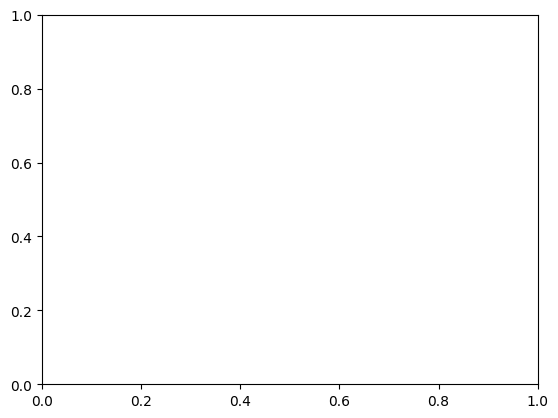

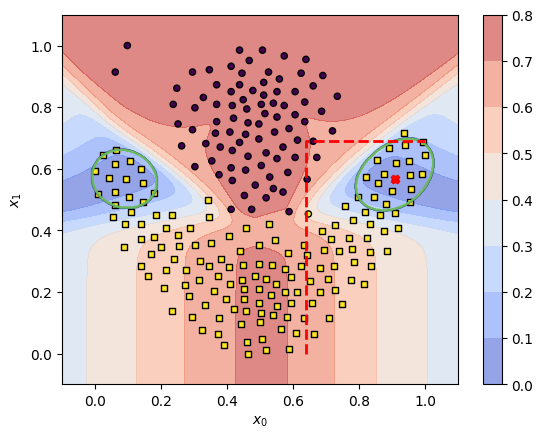

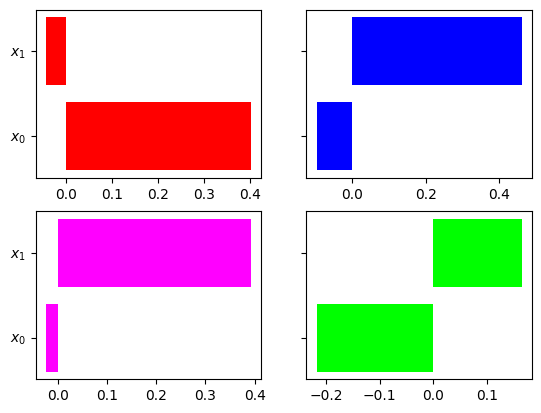

In [105]:
Z,xx,yy = toy_ex_figures(X,y,feature_names,explanations, model, explainer, i=137, p1=63, p2=41, p3=151, metric='l2')

In [27]:
threshold_diff = 0.2
gamma = 20

In [33]:
label = 1
exp_X=[get_local_exp(x, explainer, model, label=label) for x in X]
dists_exp = pairwise_distances(np.asarray(exp_X))
VD = np.asarray(dists_exp<threshold_diff).astype(int)
vd = VD[149]
clf = OneClassSVM(nu=0.01,gamma=gamma).fit(X[np.where(vd)])

Text(0, 0.5, '$x_1$')

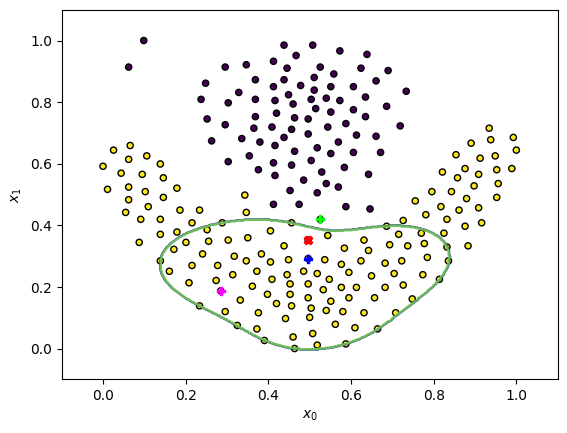

In [41]:
DecisionBoundaryDisplay.from_estimator(clf, X,eps=0.1, grid_resolution=500, alpha=0.4, response_method="predict", plot_method="contour")
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
i=149
p1=63
p2=41
p3=151
x_i = X[i]
x_p1 = X[p1]
x_p2 = X[p2]
x_p3 = X[p3]
plt.scatter(x_p1[0], x_p1[1],c='blue',marker='P')
plt.scatter(x_p2[0], x_p2[1],c='magenta',marker='P')
plt.scatter(x_p3[0], x_p3[1],c='lime',marker='P')
plt.scatter(x_i[0], x_i[1],c='red',marker='X')
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")

In [78]:
# def compute_all_areas(X, explanations, model, explainer, i, metric='euclidean'):
#     exps = explanations.copy()
#     x_i = X[i]
#     label = int(model.predict(x_i.reshape(1, -1)))
#     e_i = get_local_exp(x_i, explainer, model, label)

#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
#                         np.arange(y_min, y_max, 0.1))
#     Z = []
#     for ii in tqdm(range(xx.shape[0])):
#         for j in range(xx.shape[1]):
#             e_x = exps.pop(0)[label]
#             Z.append(diff_explanation(e_x,e_i, metric=metric))
#     Z=np.asarray(Z)
#     Z = Z.reshape(xx.shape)
#     return Z

In [55]:
# Zs=[]

In [56]:
# for i in range(len(X)):
#     Z = compute_all_areas(X, explanations, model, explainer, i, metric='euclidean')
#     Zs.append(Z)

100%|██████████| 154/154 [00:02<00:00, 53.46it/s]


In [57]:
# import pickle
# pickle.dump(Zs, open("data/Z.p", "wb"))
# pickle.dump(xx, open("data/xx.p", "wb"))
# pickle.dump(yy, open("data/yy.p", "wb"))

In [61]:
# exp_X = []
# for x_i in X:
#     label = int(model.predict(x_i.reshape(1, -1)))
#     e_i = get_local_exp(x_i, explainer, model, label)
#     exp_X.append(e_i)

In [62]:
# pickle.dump(exp_X, open("data/exp_X.p", "wb"))